In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [228]:
df=pd.read_excel('summer.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-06-01,00:00:00,0.3,922.25,4.731304,749.750000,46.000000,1084.5,45.000000,1585.25,684.75,18.600,75.749998,1.607427
1,2004-06-01,01:00:00,2.1,830.00,2.878386,644.333333,17.000000,1235.0,23.000000,1487.00,524.00,19.600,68.433332,1.544254
2,2004-06-01,02:00:00,2.1,804.50,1.985230,583.000000,18.000000,1338.5,26.000000,1493.50,526.75,17.975,76.449999,1.560788
3,2004-06-01,03:00:00,2.1,760.25,1.063153,505.250000,152.043478,1527.0,75.869565,1413.25,451.75,17.300,77.150002,1.510415
4,2004-06-01,04:00:00,2.1,782.75,1.313222,528.500000,16.000000,1437.0,24.000000,1434.50,465.75,16.500,82.250000,1.531824


In [229]:
y=df['T'].values.reshape(-1,1)
x=[]
for col in df.columns:
    if col not in ['Date', 'Time', 'T']:
        x.append(df[col].values)
x=np.transpose(x)
# x=np.reshape(x,(len(x), len(x[0])))

In [230]:
x[0]

array([3.00000000e-01, 9.22250000e+02, 4.73130449e+00, 7.49750000e+02,
       4.60000000e+01, 1.08450000e+03, 4.50000000e+01, 1.58525000e+03,
       6.84750000e+02, 7.57499981e+01, 1.60742684e+00])

In [231]:
pca=PCA(n_components=2)
pca.fit(x)
x_pca=pca.transform(x)

In [232]:
x_pca.shape

(2208, 2)

In [233]:
x_pca

array([[-347.94050186,   31.20443888],
       [-621.1103735 ,   57.40427864],
       [-685.29813364,  129.05295844],
       ...,
       [ 254.72389883, -109.76973167],
       [ 182.79451166,  -88.47601282],
       [ 180.40254855,  -70.07061712]])

Text(0.5, 1.0, 'Winter')

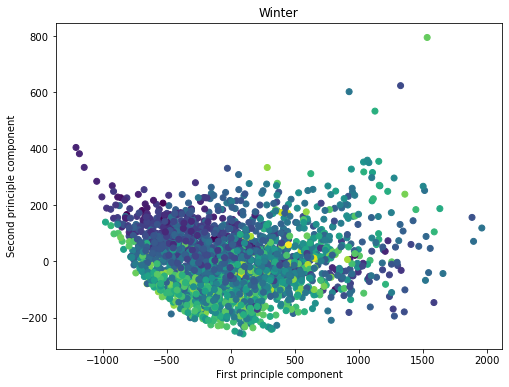

In [234]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['T'])
# plt.scatter(x_pca[:,0],df['T'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title("Winter")

In [235]:
pca.explained_variance_ratio_

array([0.88692183, 0.04769118])

In [236]:
x_pca[:,0]

array([-347.94050186, -621.1103735 , -685.29813364, ...,  254.72389883,
        182.79451166,  180.40254855])

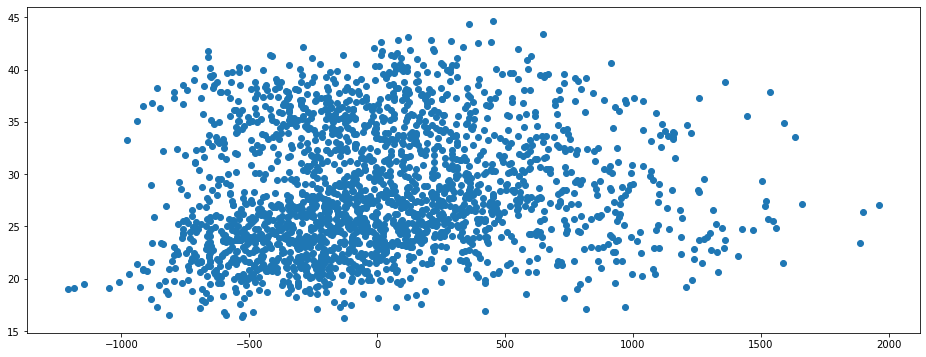

In [237]:
plt.figure(figsize=(16,6))
plt.scatter(x_pca[:,0],df["T"].values)

In [238]:
from sklearn.linear_model import LinearRegression

In [239]:
df1=pd.DataFrame()
df1["X"]=x_pca[:,0]
df1["X1"]=x_pca[:,1]
df1["X_2"]=x_pca[:,0]**2
df1["X1_2"]=x_pca[:,1]**2
df1["X_X1"]=x_pca[:,0]*x_pca[:,1]


X=df1[["X","X1","X_2","X1_2","X_X1"]]
y=df["T"]

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
c = reg.coef_
i = reg.intercept_

y_pred = reg.predict(X)

0.3210408229507602


In [ ]:
reg.coef_

In [ ]:
reg.intercept_

Text(0.5, 1.0, 'Residual Error Plot for Summer Season')

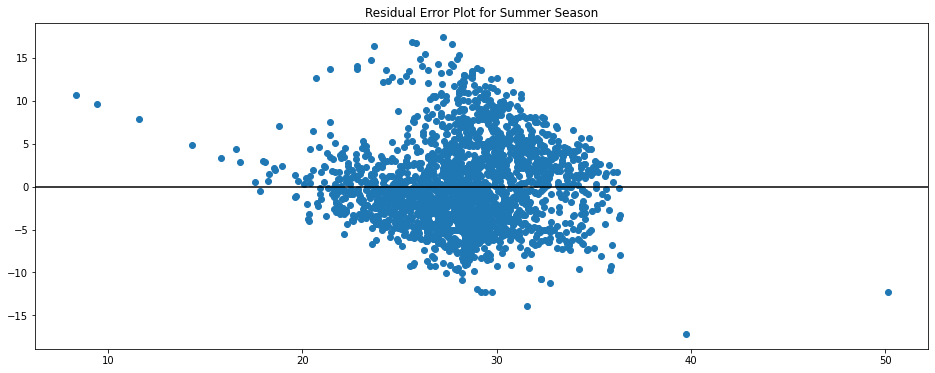

In [241]:
plt.figure(figsize=(16,6))
plt.scatter(y_pred,y-y_pred)
plt.axhline(0,color="k")
plt.title("Residual Error Plot for Summer Season")